### ライブラリ

In [29]:
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split

### カスタムのDatasetを作成

In [14]:
class MyDataset(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = data
        self.target = target
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]

        if self.transform:
            x = self.transform(x)

        return x, y

    def __len__(self):
        return len(self.data)

In [18]:
# Load the digits dataset
dataset = datasets.load_digits()
target = dataset['target']
images = dataset['images']
images = images * (255.0 / images.max())   # 0-255に正規化(transforms.ToTensor()が255にのみ対応しているため)
images = images.astype('uint8')
X_train, X_test, y_train, y_test = train_test_split(images, target, test_size=0.2, random_state=42)

In [27]:
# Create a custom dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

train_mydataset = MyDataset(X_train, y_train, transform=transform)
val_mydataset = MyDataset(X_test, y_test, transform=transform)

train_my_loader = DataLoader(train_mydataset, batch_size=10, shuffle=True)
val_my_loader = DataLoader(val_mydataset, batch_size=10, shuffle=False)

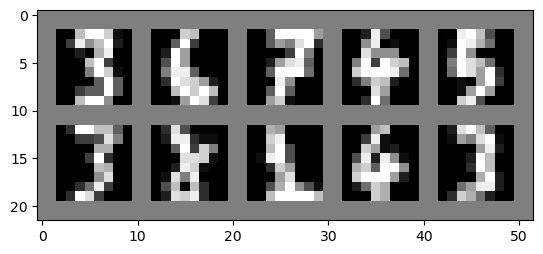

In [32]:
images, labels = next(iter(train_my_loader))
grid_images = torchvision.utils.make_grid(images, nrow=5)
grid_images = grid_images / 2 + 0.5   # unnormalize
plt.imshow(torch.permute(grid_images, (1, 2, 0)))